In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    
    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, scheduler, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval, )

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x10e361f60>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x10e35bda0>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRuleWithWeightDecay, GradientDescentLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import ConstantLearningRateScheduler
from mlp.penalties import L2Penalty

Epoch 1: 7.7s to complete
    error(train)=3.85e+00, acc(train)=2.37e-02, error(valid)=3.85e+00, acc(valid)=2.41e-02


Epoch 2: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.36e-02, error(valid)=3.85e+00, acc(valid)=2.34e-02


Epoch 3: 5.4s to complete
    error(train)=3.85e+00, acc(train)=2.53e-02, error(valid)=3.85e+00, acc(valid)=2.65e-02


Epoch 4: 6.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 5: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 6: 5.9s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 7: 5.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 8: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 9: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 10: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 11: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 12: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 13: 5.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 14: 5.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 15: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 16: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 17: 7.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 18: 12.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 19: 9.0s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 20: 10.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 21: 8.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 22: 10.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 23: 8.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 24: 8.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 25: 8.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 26: 8.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 27: 8.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 28: 8.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 29: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 30: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 31: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 32: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 33: 8.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 34: 9.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 35: 8.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 36: 8.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 37: 8.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 38: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 39: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 40: 8.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 41: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 42: 8.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 43: 8.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 44: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 45: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 46: 8.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 47: 8.8s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 48: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 49: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 50: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 51: 8.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 52: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 53: 8.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 54: 8.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 55: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 56: 8.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 57: 8.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 58: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 59: 8.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 60: 8.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 61: 8.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 62: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 63: 8.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 64: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 65: 8.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 66: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 67: 8.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 68: 8.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 69: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 70: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 71: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 72: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 73: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 74: 8.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 75: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 76: 8.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 77: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 78: 8.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 79: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 80: 8.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 81: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 82: 8.7s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 83: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 84: 8.6s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


Epoch 85: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


Epoch 86: 8.9s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


Epoch 87: 8.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


Epoch 88: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 89: 8.5s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


Epoch 90: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


Epoch 91: 8.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


Epoch 92: 8.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.01e-02


Epoch 93: 8.7s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


Epoch 94: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


Epoch 95: 8.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 96: 7.1s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


Epoch 97: 5.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


Epoch 98: 5.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


Epoch 99: 5.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


Epoch 100: 5.3s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02



--------------------------------------------------------------------------------
weight_decay=0.00
--------------------------------------------------------------------------------


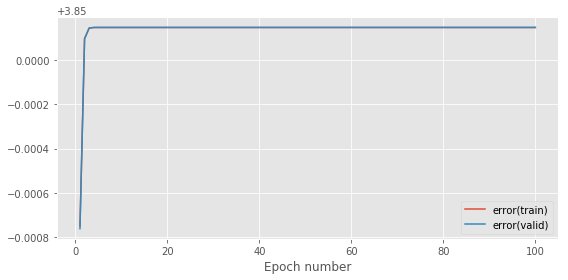

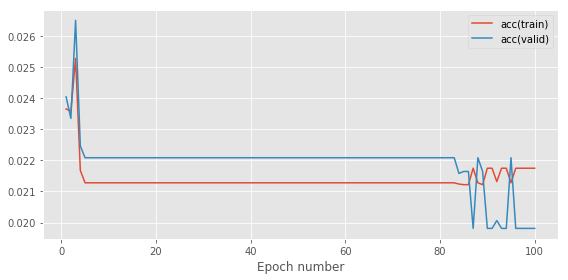

    final error(train) = 3.85e+00
    final error(valid) = 3.85e+00
    final acc(train)   = 2.17e-02
    final acc(valid)   = 1.98e-02
    run time per epoch = 9.86


Epoch 1: 4.3s to complete
    error(train)=3.86e+00, acc(train)=1.51e-02, error(valid)=3.86e+00, acc(valid)=1.47e-02


Epoch 2: 4.2s to complete
    error(train)=3.85e+00, acc(train)=1.51e-02, error(valid)=3.85e+00, acc(valid)=1.46e-02


Epoch 3: 4.2s to complete
    error(train)=3.85e+00, acc(train)=1.50e-02, error(valid)=3.85e+00, acc(valid)=1.47e-02


Epoch 4: 4.5s to complete
    error(train)=3.85e+00, acc(train)=1.50e-02, error(valid)=3.85e+00, acc(valid)=1.47e-02


Epoch 5: 4.3s to complete
    error(train)=3.85e+00, acc(train)=1.50e-02, error(valid)=3.85e+00, acc(valid)=1.46e-02


Epoch 6: 4.3s to complete
    error(train)=3.85e+00, acc(train)=1.50e-02, error(valid)=3.85e+00, acc(valid)=1.47e-02


Epoch 7: 4.6s to complete
    error(train)=3.85e+00, acc(train)=1.50e-02, error(valid)=3.85e+00, acc(valid)=1.47e-02


Epoch 8: 4.3s to complete
    error(train)=3.85e+00, acc(train)=1.51e-02, error(valid)=3.85e+00, acc(valid)=1.49e-02


Epoch 9: 4.5s to complete
    error(train)=3.85e+00, acc(train)=1.51e-02, error(valid)=3.85e+00, acc(valid)=1.49e-02


Epoch 10: 4.3s to complete
    error(train)=3.85e+00, acc(train)=1.51e-02, error(valid)=3.85e+00, acc(valid)=1.48e-02


Epoch 11: 4.5s to complete
    error(train)=3.85e+00, acc(train)=1.51e-02, error(valid)=3.85e+00, acc(valid)=1.49e-02


Epoch 12: 4.3s to complete
    error(train)=3.85e+00, acc(train)=1.52e-02, error(valid)=3.85e+00, acc(valid)=1.49e-02


Epoch 13: 4.3s to complete
    error(train)=3.85e+00, acc(train)=1.51e-02, error(valid)=3.85e+00, acc(valid)=1.49e-02


Epoch 14: 4.6s to complete
    error(train)=3.85e+00, acc(train)=1.50e-02, error(valid)=3.85e+00, acc(valid)=1.47e-02


Epoch 15: 4.2s to complete
    error(train)=3.85e+00, acc(train)=1.48e-02, error(valid)=3.85e+00, acc(valid)=1.46e-02


Epoch 16: 4.0s to complete
    error(train)=3.85e+00, acc(train)=1.51e-02, error(valid)=3.85e+00, acc(valid)=1.50e-02


Epoch 17: 4.0s to complete
    error(train)=3.85e+00, acc(train)=1.56e-02, error(valid)=3.85e+00, acc(valid)=1.58e-02


Epoch 18: 2068.1s to complete
    error(train)=3.85e+00, acc(train)=1.60e-02, error(valid)=3.85e+00, acc(valid)=1.61e-02


Epoch 19: 4.0s to complete
    error(train)=3.85e+00, acc(train)=1.61e-02, error(valid)=3.85e+00, acc(valid)=1.68e-02


Epoch 20: 4.8s to complete
    error(train)=3.85e+00, acc(train)=1.63e-02, error(valid)=3.85e+00, acc(valid)=1.72e-02


Epoch 21: 6.1s to complete
    error(train)=3.85e+00, acc(train)=1.65e-02, error(valid)=3.85e+00, acc(valid)=1.72e-02


Epoch 22: 5.8s to complete
    error(train)=3.85e+00, acc(train)=1.64e-02, error(valid)=3.85e+00, acc(valid)=1.73e-02


Epoch 23: 5.6s to complete
    error(train)=3.85e+00, acc(train)=1.67e-02, error(valid)=3.85e+00, acc(valid)=1.78e-02


Epoch 24: 5.8s to complete
    error(train)=3.85e+00, acc(train)=1.72e-02, error(valid)=3.85e+00, acc(valid)=1.73e-02


Epoch 25: 259.9s to complete
    error(train)=3.85e+00, acc(train)=1.74e-02, error(valid)=3.85e+00, acc(valid)=1.77e-02


Epoch 26: 4.9s to complete
    error(train)=3.85e+00, acc(train)=1.73e-02, error(valid)=3.85e+00, acc(valid)=1.80e-02


Epoch 27: 6.5s to complete
    error(train)=3.85e+00, acc(train)=1.75e-02, error(valid)=3.85e+00, acc(valid)=1.80e-02


Epoch 28: 4.2s to complete
    error(train)=3.85e+00, acc(train)=1.79e-02, error(valid)=3.85e+00, acc(valid)=1.82e-02


Epoch 29: 6.4s to complete
    error(train)=3.85e+00, acc(train)=1.85e-02, error(valid)=3.85e+00, acc(valid)=1.82e-02


Epoch 30: 4.8s to complete
    error(train)=3.85e+00, acc(train)=1.85e-02, error(valid)=3.85e+00, acc(valid)=1.81e-02


Epoch 31: 4.6s to complete
    error(train)=3.85e+00, acc(train)=1.86e-02, error(valid)=3.85e+00, acc(valid)=1.81e-02


Epoch 32: 4.3s to complete
    error(train)=3.85e+00, acc(train)=1.87e-02, error(valid)=3.85e+00, acc(valid)=1.85e-02


Epoch 33: 5.2s to complete
    error(train)=3.85e+00, acc(train)=1.89e-02, error(valid)=3.85e+00, acc(valid)=1.85e-02


Epoch 34: 6.8s to complete
    error(train)=3.85e+00, acc(train)=1.93e-02, error(valid)=3.85e+00, acc(valid)=1.89e-02


Epoch 35: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.02e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


Epoch 36: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


Epoch 37: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.36e-02, error(valid)=3.85e+00, acc(valid)=2.32e-02


Epoch 38: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.55e-02, error(valid)=3.85e+00, acc(valid)=2.58e-02


Epoch 39: 15.6s to complete
    error(train)=3.85e+00, acc(train)=2.55e-02, error(valid)=3.85e+00, acc(valid)=2.53e-02


Epoch 40: 17.9s to complete
    error(train)=3.85e+00, acc(train)=2.44e-02, error(valid)=3.85e+00, acc(valid)=2.41e-02


Epoch 41: 14.0s to complete
    error(train)=3.85e+00, acc(train)=2.34e-02, error(valid)=3.85e+00, acc(valid)=2.30e-02


Epoch 42: 8.1s to complete
    error(train)=3.85e+00, acc(train)=2.26e-02, error(valid)=3.85e+00, acc(valid)=2.29e-02


Epoch 43: 9.2s to complete
    error(train)=3.85e+00, acc(train)=2.20e-02, error(valid)=3.85e+00, acc(valid)=2.17e-02


Epoch 44: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.14e-02, error(valid)=3.85e+00, acc(valid)=2.12e-02


Epoch 45: 10.8s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.14e-02


Epoch 46: 11.1s to complete
    error(train)=3.85e+00, acc(train)=2.06e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


Epoch 47: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.07e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


Epoch 48: 9.1s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


Epoch 49: 8.0s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.18e-02


Epoch 50: 9.8s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


Epoch 51: 11.6s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


Epoch 52: 7.3s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


Epoch 53: 8.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


Epoch 54: 9.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


Epoch 55: 7.6s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02


Epoch 56: 7.4s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.18e-02


Epoch 57: 6.9s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


Epoch 58: 10.0s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


Epoch 59: 7.9s to complete
    error(train)=3.85e+00, acc(train)=2.09e-02, error(valid)=3.85e+00, acc(valid)=2.14e-02


Epoch 60: 7.1s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


Epoch 61: 6.9s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


Epoch 62: 6.9s to complete
    error(train)=3.85e+00, acc(train)=2.07e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


Epoch 63: 7.0s to complete
    error(train)=3.85e+00, acc(train)=2.05e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


Epoch 64: 6.8s to complete
    error(train)=3.85e+00, acc(train)=2.03e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


Epoch 65: 6.9s to complete
    error(train)=3.85e+00, acc(train)=2.01e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


Epoch 66: 6.7s to complete
    error(train)=3.85e+00, acc(train)=1.97e-02, error(valid)=3.85e+00, acc(valid)=2.06e-02


Epoch 67: 6.9s to complete
    error(train)=3.85e+00, acc(train)=1.94e-02, error(valid)=3.85e+00, acc(valid)=2.06e-02


Epoch 68: 6.8s to complete
    error(train)=3.85e+00, acc(train)=1.94e-02, error(valid)=3.85e+00, acc(valid)=2.06e-02


Epoch 69: 6.8s to complete
    error(train)=3.85e+00, acc(train)=1.93e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


Epoch 70: 6.7s to complete
    error(train)=3.85e+00, acc(train)=1.91e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02


Epoch 71: 6.7s to complete
    error(train)=3.85e+00, acc(train)=1.91e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


Epoch 72: 7.0s to complete
    error(train)=3.85e+00, acc(train)=1.92e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


Epoch 73: 7.0s to complete
    error(train)=3.85e+00, acc(train)=1.93e-02, error(valid)=3.85e+00, acc(valid)=2.10e-02


Epoch 74: 7.2s to complete
    error(train)=3.85e+00, acc(train)=1.94e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


Epoch 75: 6.8s to complete
    error(train)=3.85e+00, acc(train)=1.95e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


Epoch 76: 7.0s to complete
    error(train)=3.85e+00, acc(train)=1.97e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


Epoch 77: 6.6s to complete
    error(train)=3.85e+00, acc(train)=2.00e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


Epoch 78: 6.8s to complete
    error(train)=3.85e+00, acc(train)=2.02e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


Epoch 79: 6.7s to complete
    error(train)=3.85e+00, acc(train)=2.04e-02, error(valid)=3.85e+00, acc(valid)=2.22e-02


Epoch 80: 6.7s to complete
    error(train)=3.85e+00, acc(train)=2.06e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


Epoch 81: 7.0s to complete
    error(train)=3.85e+00, acc(train)=2.08e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 82: 6.7s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 83: 7.0s to complete
    error(train)=3.85e+00, acc(train)=2.10e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 84: 6.8s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 85: 7.0s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 86: 6.9s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 87: 7.1s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 88: 6.7s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 89: 7.1s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 90: 6.7s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 91: 6.7s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 92: 7.0s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 93: 6.9s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 94: 7.1s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 95: 6.9s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 96: 7.1s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 97: 7.1s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 98: 6.7s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 99: 6.8s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 100: 6.9s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02



--------------------------------------------------------------------------------
weight_decay=0.00
--------------------------------------------------------------------------------


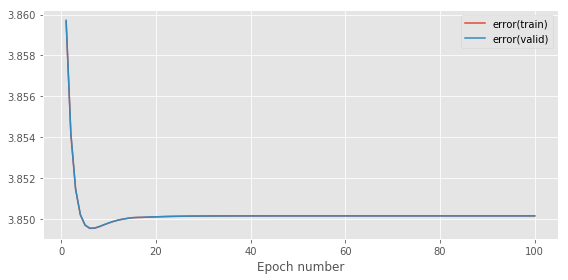

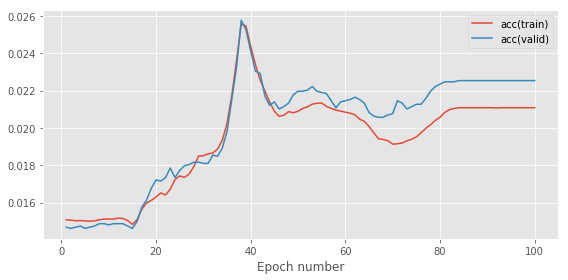

    final error(train) = 3.85e+00
    final error(valid) = 3.85e+00
    final acc(train)   = 2.11e-02
    final acc(valid)   = 2.25e-02
    run time per epoch = 31.93


In [4]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

#setup hyperparameters
weight_decay = 1e-4
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
learning_rate = 1e-3

for weight_decay in weight_decays:

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    scheduler = ConstantLearningRateScheduler(learning_rate)

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, weight_decay=weight_decay)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True)

    fig_1.tight_layout()
    fig_1_name = "adam_w_fig_1_" + str(learning_rate) + ".pdf"
    fig_1.savefig(fig_1_name)

    fig_2.tight_layout()
    fig_2_name = "adam_w_fig_2_" + str(learning_rate) + ".pdf"
    fig_2.savefig(fig_2_name)

    print('-' * 80)
    print('weight_decay={0:.2f}'
          .format(weight_decay))
    print('-' * 80)

    plt.show()

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))
    